# Vibración tipo falsete

In [1]:
from model import *

In [2]:
m = {'1': 0.125, '2': 0.025, '3': 0.005} # g
d = {'1': 0.25, '2': 0.05, '3': 0.01} # cm
r = {'1': 0.02, '2': 0.005, '3': 0.005} # g/ms
k = {'1': 0.08, '2': 0.08, '3': 0.01, '1,2': 0.025, '2,3': 0.01} # g/ms^2
c = {'1': 3 * k['1'], '2': 3 * k['2'], '3': 3 * k['3']} # g/ms^2
a0 = {'1': 0.05, '2': 0.05, '3': 0.05} # cm^2
l = 1.4 # cm
rho = 0.00113 # g/cm^3
Ps = 0.008 # g/cm ms^2

In [3]:
y0 = [0.1, 0.1, 0.1, 0, 0, 0]
t = np.linspace(0, 1000, 20001)
tmin, tmax = 2000, 2400
sol = odeint(model, y0, t, args=(m, d, r, k, c, a0, l, Ps))

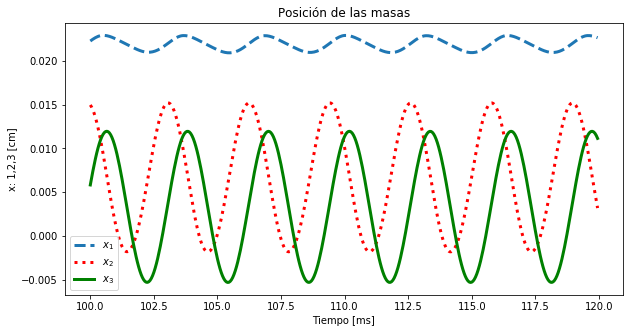

In [4]:
x1, x2, x3 = sol[:, 0], sol[:, 1], sol[:, 2]

plt.figure(figsize=(10,5))
plt.plot(t[tmin:tmax], x1[tmin:tmax], '--', linewidth=3)
plt.plot(t[tmin:tmax], x2[tmin:tmax], 'r:', linewidth=3)
plt.plot(t[tmin:tmax], x3[tmin:tmax], 'g', linewidth=3)
plt.title('Posición de las masas')
plt.xlabel('Tiempo [ms]')
plt.ylabel('x: 1,2,3 [cm]')
plt.legend(('$x_1$', '$x_2$', '$x_3$'))
plt.show()

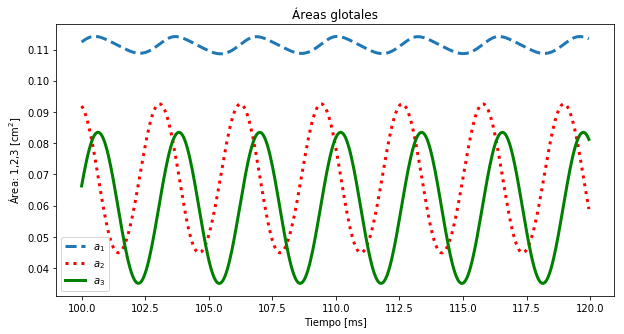

In [5]:
a1 = a0['1'] + 2 * l * x1
a2 = a0['2'] + 2 * l * x2
a3 = a0['3'] + 2 * l * x3

plt.figure(figsize=(10,5))
plt.plot(t[tmin:tmax], a1[tmin:tmax], '--', linewidth=3)
plt.plot(t[tmin:tmax], a2[tmin:tmax], 'r:', linewidth=3)
plt.plot(t[tmin:tmax], a3[tmin:tmax], 'g', linewidth=3)
plt.title('Áreas glotales')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Área: 1,2,3 [cm$^2$]')
plt.legend(('$a_1$', '$a_2$', '$a_3$'))
plt.show()

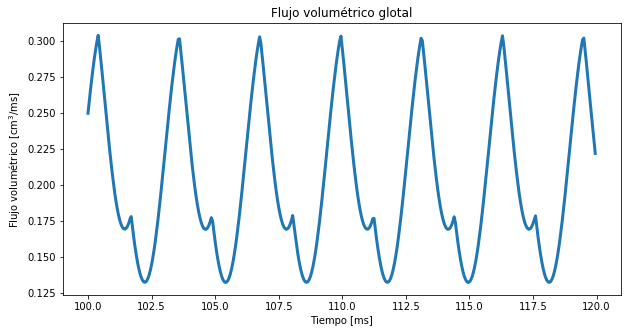

In [6]:
a_min = np.asarray([a1, a2, a3]).min(0)
U = np.sqrt((2 * Ps) / rho) * a_min * np.vectorize(theta)(a_min)

plt.figure(figsize=(10,5))
plt.plot(t[tmin:tmax], U[tmin:tmax], linewidth=3)
plt.title('Flujo volumétrico glotal')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Flujo volumétrico [cm$^3$/ms]')
plt.show()